In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Historical Public Debt Database.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Display the first few rows and the summary of the dataset
print(data.head())
print(data.info())


  Country Name  Country Code     Indicator Name Indicator Code Attribute  \
0     Portugal           182  Debt to GDP Ratio     GGXWDG_GDP     Value   
1        Qatar           453  Debt to GDP Ratio     GGXWDG_GDP     Value   
2      Romania           968  Debt to GDP Ratio     GGXWDG_GDP     Value   
3       Russia           922  Debt to GDP Ratio     GGXWDG_GDP     Value   
4       Rwanda           714  Debt to GDP Ratio     GGXWDG_GDP     Value   

   1800  1801  1802  1803  1804  ...       2007       2008       2009  \
0   NaN   NaN   NaN   NaN   NaN  ...  68.439083  71.666333  83.609401   
1   NaN   NaN   NaN   NaN   NaN  ...   8.927508  11.095734  35.972303   
2   NaN   NaN   NaN   NaN   NaN  ...  12.651644  13.387073  23.347557   
3   NaN   NaN   NaN   NaN   NaN  ...   8.010246   7.425429   9.890471   
4   NaN   NaN   NaN   NaN   NaN  ...  26.709372  20.903872  22.366127   

        2010        2011        2012        2013        2014        2015  \
0  96.183319  111.389679  12

In [ ]:
# Remove columns with all missing values
data_cleaned = data.dropna(axis=1, how='all')

# Drop irrelevant columns if necessary (e.g., 'Unnamed: 221')
if 'Unnamed: 221' in data_cleaned.columns:
    data_cleaned = data_cleaned.drop(columns=['Unnamed: 221'])

# Summary of the cleaned dataset
print(data_cleaned.info())
print(data_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Columns: 221 entries, Country Name to 2015
dtypes: float64(216), int64(1), object(4)
memory usage: 329.9+ KB
None
  Country Name  Country Code     Indicator Name Indicator Code Attribute  \
0     Portugal           182  Debt to GDP Ratio     GGXWDG_GDP     Value   
1        Qatar           453  Debt to GDP Ratio     GGXWDG_GDP     Value   
2      Romania           968  Debt to GDP Ratio     GGXWDG_GDP     Value   
3       Russia           922  Debt to GDP Ratio     GGXWDG_GDP     Value   
4       Rwanda           714  Debt to GDP Ratio     GGXWDG_GDP     Value   

   1800  1801  1802  1803  1804  ...       2006       2007       2008  \
0   NaN   NaN   NaN   NaN   NaN  ...  61.618800  68.439083  71.666333   
1   NaN   NaN   NaN   NaN   NaN  ...  13.430801   8.927508  11.095734   
2   NaN   NaN   NaN   NaN   NaN  ...  12.536329  12.651644  13.387073   
3   NaN   NaN   NaN   NaN   NaN  ...   9.776498   8.010246   7.42

In [ ]:
# Generate summary statistics for the numerical columns
summary_stats = data_cleaned.describe()
print(summary_stats)



       Country Code        1800        1801        1802        1803  \
count    191.000000    3.000000    3.000000    3.000000    3.000000   
mean     548.020942   76.416873   75.813421   79.765590   80.135148   
std      265.059913   87.347460   88.523405   94.988897   96.154582   
min      111.000000   18.082789   15.719697   16.469388   15.799180   
25%      310.000000   26.205309   24.985132   25.153385   24.867722   
50%      566.000000   34.327830   34.250567   33.837382   33.936264   
75%      733.500000  105.583915  105.860284  111.413691  112.303132   
max      968.000000  176.840000  177.470000  188.990000  190.670000   

             1804        1805        1806        1807        1808  ...  \
count    3.000000    3.000000    3.000000    3.000000    3.000000  ...   
mean    79.325204   76.552984   75.805064   75.269952   74.535776  ...   
std     94.852947   97.652048  101.303393  102.785767  101.320569  ...   
min     16.179775   13.902027   12.430213   12.269504   14.14316

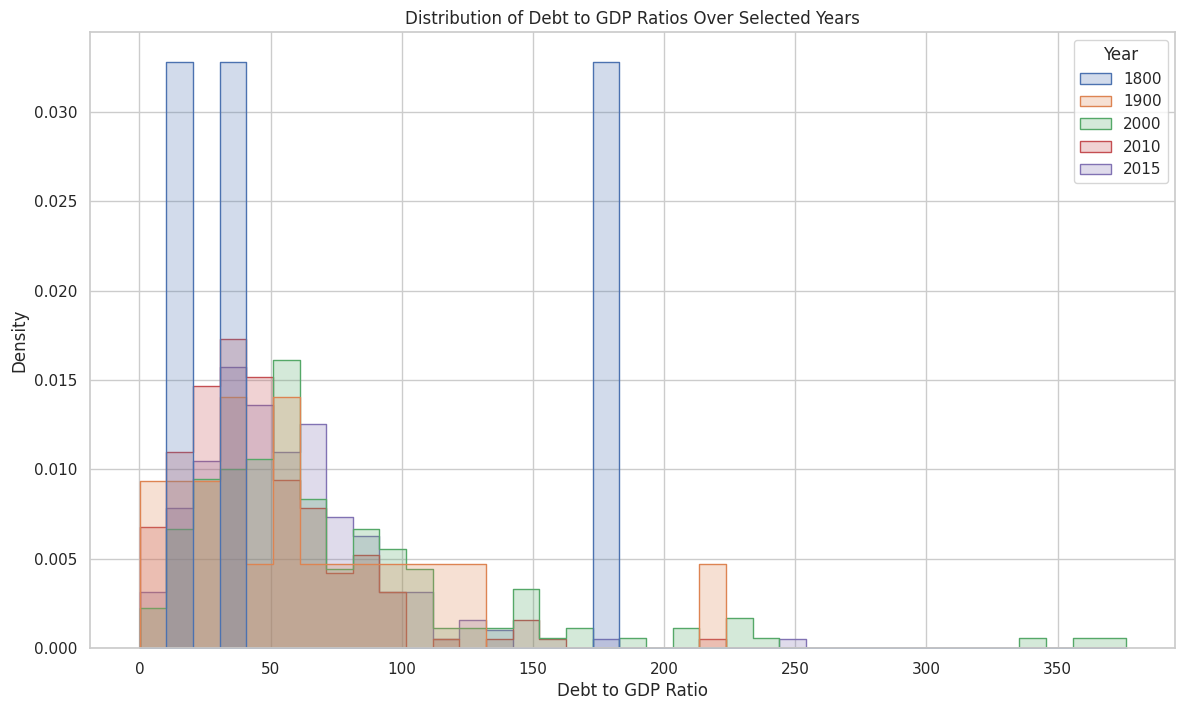

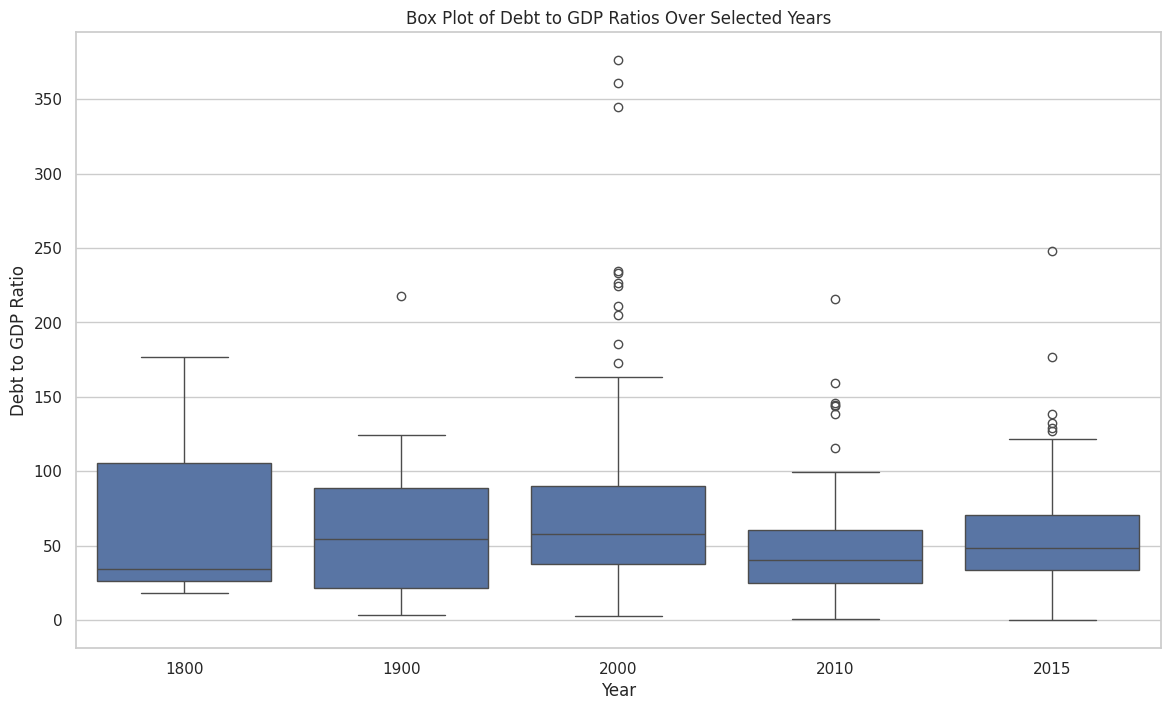

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visualization style
sns.set(style="whitegrid")

# Select a subset of columns for visualization to avoid overplotting
columns_to_plot = ['1800', '1900', '2000', '2010', '2015']

# Drop rows with all NaNs for the selected columns
subset_data = data_cleaned[['Country Name'] + columns_to_plot].dropna(how='all')

# Melt the data for easier plotting
melted_data = pd.melt(subset_data, id_vars=['Country Name'], value_vars=columns_to_plot,
                      var_name='Year', value_name='Debt to GDP Ratio')

# Plot histograms
plt.figure(figsize=(14, 8))
sns.histplot(data=melted_data, x='Debt to GDP Ratio', hue='Year', element='step', stat='density', common_norm=False)
plt.title('Distribution of Debt to GDP Ratios Over Selected Years')
plt.xlabel('Debt to GDP Ratio')
plt.ylabel('Density')
plt.show()

# Plot box plots
plt.figure(figsize=(14, 8))
sns.boxplot(data=melted_data, x='Year', y='Debt to GDP Ratio')
plt.title('Box Plot of Debt to GDP Ratios Over Selected Years')
plt.xlabel('Year')
plt.ylabel('Debt to GDP Ratio')
plt.show()


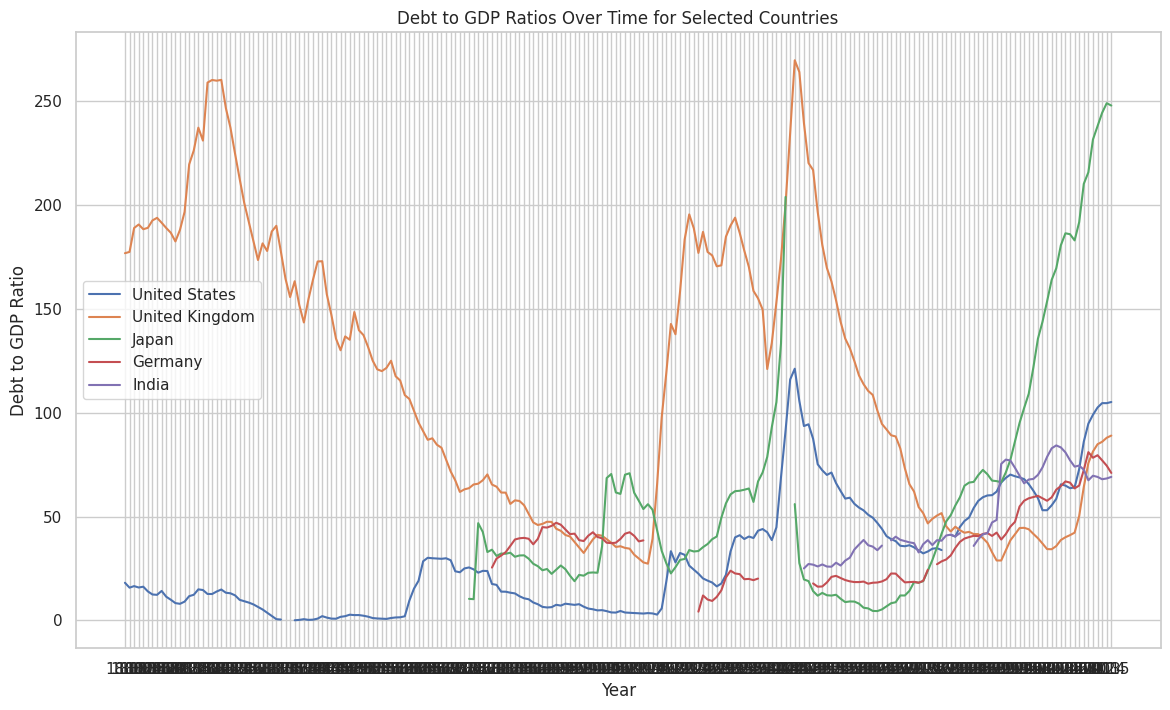

In [ ]:
# Time series plot for selected countries
selected_countries = ['United States', 'United Kingdom', 'Japan', 'Germany', 'India']
time_series_data = data_cleaned[data_cleaned['Country Name'].isin(selected_countries)]
time_series_data = time_series_data.set_index('Country Name').transpose().drop(['Country Code', 'Indicator Name', 'Indicator Code', 'Attribute'])

plt.figure(figsize=(14, 8))
for country in selected_countries:
    plt.plot(time_series_data.index, time_series_data[country], label=country)

plt.title('Debt to GDP Ratios Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Debt to GDP Ratio')
plt.legend()
plt.show()


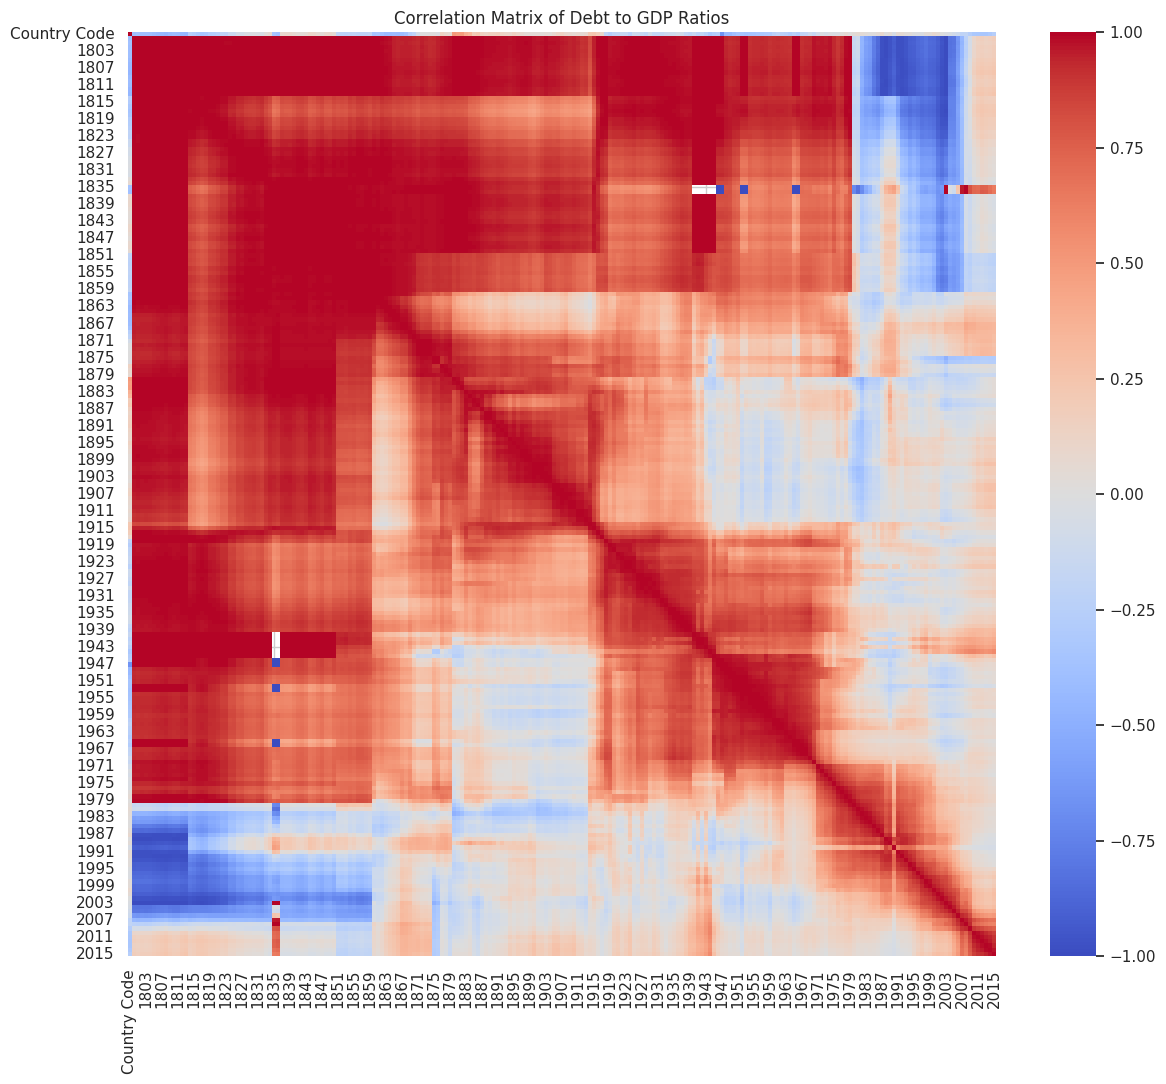

In [ ]:
# Select only the numeric columns for correlation analysis
numeric_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Debt to GDP Ratios')
plt.show()
